### SharkAttack - Parte 1

# Análisis inicial

In [ ]:
%pip install ipython
%pip install seaborn

In [1]:
import pandas as pd
import numpy as np
import zipfile
import pylab as plt    
import seaborn as sns

# import warnings
# warnings.filterwarnings('ignore')   # para quitar esos prints

pd.set_option('display.max_columns', None)  # me muestre todas las columnas


In [2]:
zf=zipfile.ZipFile('../data/archive.zip')

shark = pd.read_csv(zf.open('attacks.csv'), nrows=1e4)

shark.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 698: invalid start byte

Me da error UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 698: invalid start byte por lo que necesito saber el encode del archivo

In [3]:
import chardet

# Detectar la codificación de un archivo
with open('../data/attacks.csv', 'rb') as file:
    result = chardet.detect(file.read())
    encoding = result['encoding']

print("La codificación del archivo es:", encoding)

La codificación del archivo es: Windows-1252


Una vez conocido lo especifico en el código

In [4]:
zf=zipfile.ZipFile('../data/archive.zip')

shark = pd.read_csv(zf.open('attacks.csv'), nrows=1e4, encoding='Windows-1252')

shark.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


Elimino todos los espacios que hay en los nombres de las columnas y hago todas minúsculas para poder trabajar sin problemas con las columnas

In [5]:
shark.columns = [e.lower().replace(' ', '') for e in shark.columns]

Reviso el número de filas y columnas que tiene el df y lo asigno a una variable para poder compararlo en el futuro 

In [6]:
shark_size = shark.shape
shark_size

(10000, 24)

Reviso de que tipo de dato son las columnas y el número de nulos que tienen

In [7]:
shark.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   casenumber            8701 non-null   object 
 1   date                  6302 non-null   object 
 2   year                  6300 non-null   float64
 3   type                  6298 non-null   object 
 4   country               6252 non-null   object 
 5   area                  5847 non-null   object 
 6   location              5762 non-null   object 
 7   activity              5758 non-null   object 
 8   name                  6092 non-null   object 
 9   sex                   5737 non-null   object 
 10  age                   3471 non-null   object 
 11  injury                6274 non-null   object 
 12  fatal(y/n)            5763 non-null   object 
 13  time                  2948 non-null   object 
 14  species               3464 non-null   object 
 15  investigatororsource

Hay algunos nombres de columnas con : que me pueden molestar aasí que los voy a eliminar

In [8]:
shark.columns = [e.replace(':', '') for e in shark.columns]

La mayoría de las columnas son objetos y la mayoría tienen muchos valores nulos, así que reviso el total de nulos tiene cada una

In [9]:
nan_cols = shark.isna().sum()

nan_cols[nan_cols>0]

casenumber              1299
date                    3698
year                    3700
type                    3702
country                 3748
area                    4153
location                4238
activity                4242
name                    3908
sex                     4263
age                     6529
injury                  3726
fatal(y/n)              4237
time                    7052
species                 6536
investigatororsource    3715
pdf                     3698
hrefformula             3699
href                    3698
casenumber.1            3698
casenumber.2            3698
originalorder           3691
unnamed22               9999
unnamed23               9998
dtype: int64

Para verlo de una manera más gráfica creo una grafico de nulos en el dataframe

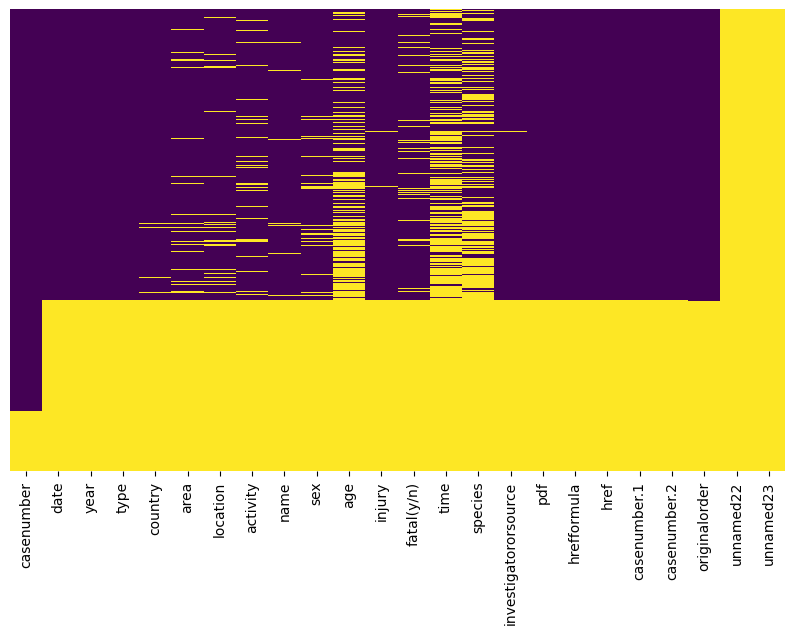

In [10]:
plt.figure(figsize=(10, 6))  # inicia la figura y establece el tamaño

sns.heatmap(shark.isna(),      # datos
            yticklabels=False,  # quita las etiquetas del eje y
            cmap='viridis',     # mapa de color
            cbar=False,         # sin barra lateral
           )


plt.show();

🤯🤯🤯🤯🤯🤯🤯🤯🤯🤯🤯🤯🤯🤯




Las dos últimas columnas Unnamed parece que están completamente vacías. Voy a comprobarlo, y si lo están (como no puedo eliminar columnas) las voy a rellenar todo con 0

In [11]:
shark_size

(10000, 24)

In [12]:
shark.unnamed22.isna().sum()

9999

Como solo hay un valor que no es nan no lo considero representativo y relleno toda la columna con 0

In [13]:
shark['unnamed22'] = 0

Realizo la misma operación con unnamed23

In [14]:
shark.unnamed23.isna().sum()

9998

In [15]:
shark['unnamed23'] = 0

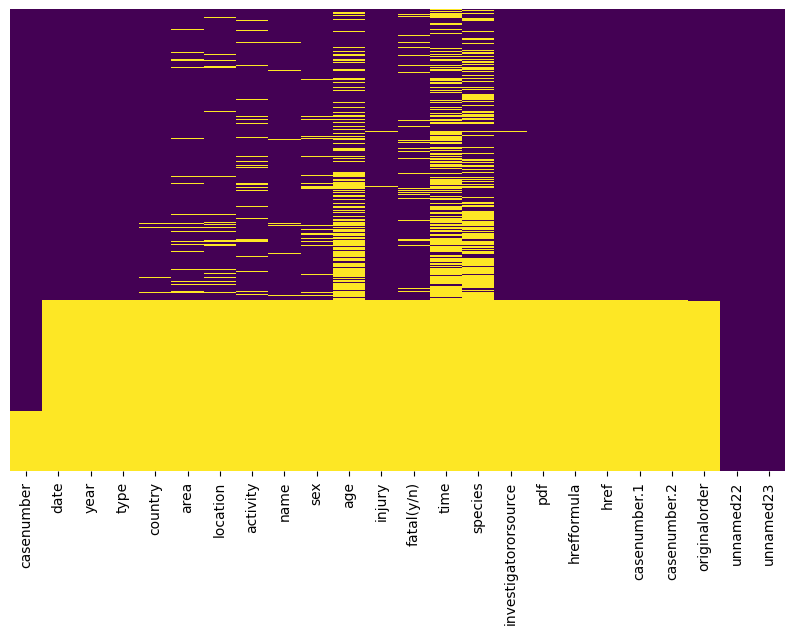

In [16]:
plt.figure(figsize=(10, 6))  # inicia la figura y establece el tamaño

sns.heatmap(shark.isna(),      # datos
            yticklabels=False,  # quita las etiquetas del eje y
            cmap='viridis',     # mapa de color
            cbar=False,         # sin barra lateral
           )


plt.show();

Como veo que el código de la representación gráfica lo voy a usar varias veces le voy a hacer una función

In [17]:
def grafico(df):
    plt.figure(figsize=(10, 6))  # inicia la figura y establece el tamaño

    sns.heatmap(shark.isna(),      # datos
            yticklabels=False,  # quita las etiquetas del eje y
            cmap='viridis',     # mapa de color
            cbar=False,         # sin barra lateral
           )


    plt.show();

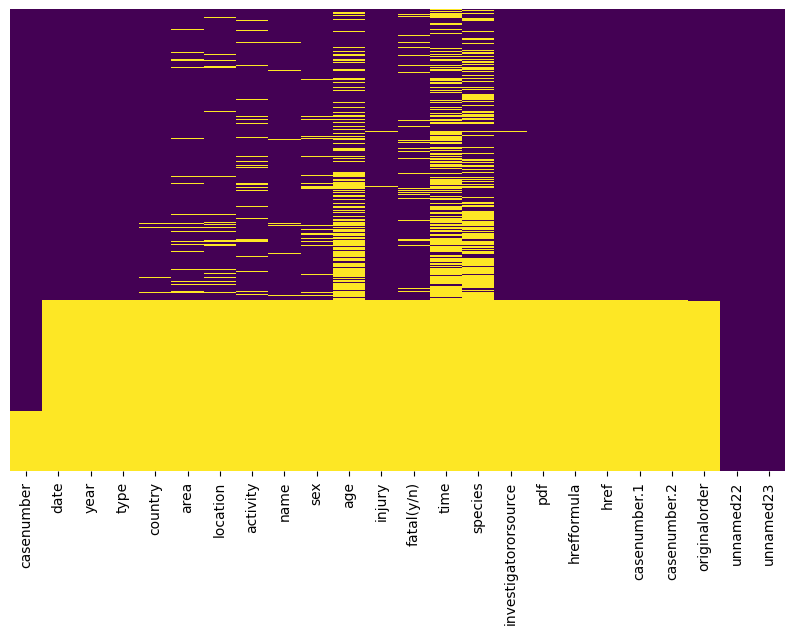

In [18]:
grafico(shark)

Estoy viendo que la mayoría de filas a partir de un determinado numero no tienen apenas datos y parece que son poco representativas así que voy a profundizar un poco en este proceso

Veo a partir de que fila empieza a tener nulos la columna year que es de las primeras que muestra este patron

In [30]:
filas_nulas = shark.index[shark['year'].isnull()].tolist()

filas_nulas[:15]

[187,
 6079,
 6302,
 6303,
 6304,
 6305,
 6306,
 6307,
 6308,
 6309,
 6310,
 6311,
 6312,
 6313,
 6314]

como quiero saber que a partir de que fila tienen todos los valores nulos salvo los de la columna unnamed23 y unnamed22 hago un bucle que me lo compruebe y de ser así que me lo introduzca en un diccionario

In [42]:
col_vac = {}

for columna in shark:
    filas_nulas = shark.index[shark[columna].isnull()].tolist()
    col_vac[columna] = filas_nulas

In [44]:
prim_fil = {}

for columna, filas_nulas in col_vac.items():
    prim_fil[columna] = filas_nulas[:5]

prim_fil

{'casenumber': [5488, 8702, 8703, 8704, 8705],
 'date': [6302, 6303, 6304, 6305, 6306],
 'year': [187, 6079, 6302, 6303, 6304],
 'type': [85, 382, 4867, 5705, 6302],
 'country': [62, 525, 2956, 3378, 3387],
 'area': [32, 33, 48, 56, 59],
 'location': [56, 62, 101, 110, 132],
 'activity': [47, 108, 112, 114, 154],
 'name': [32, 86, 124, 154, 184],
 'sex': [32, 59, 86, 124, 154],
 'age': [3, 4, 5, 15, 16],
 'injury': [1270, 1366, 2250, 2267, 2648],
 'fatal(y/n)': [27, 76, 79, 84, 98],
 'time': [3, 4, 5, 7, 11],
 'species': [1, 2, 5, 9, 11],
 'investigatororsource': [119, 290, 382, 631, 1130],
 'pdf': [6302, 6303, 6304, 6305, 6306],
 'hrefformula': [3244, 6302, 6303, 6304, 6305],
 'href': [6302, 6303, 6304, 6305, 6306],
 'casenumber.1': [6302, 6303, 6304, 6305, 6306],
 'casenumber.2': [6302, 6303, 6304, 6305, 6306],
 'originalorder': [6309, 6310, 6311, 6312, 6313],
 'unnamed22': [],
 'unnamed23': []}

Veo que la columna casenumber empieza a arrojar nulos después que el resto de columnas por lo que voy a ver que hay en esos valores

In [49]:
shark['casenumber'].loc[6302:8702].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2401 entries, 6302 to 8702
Series name: casenumber
Non-Null Count  Dtype 
--------------  ----- 
2400 non-null   object
dtypes: object(1)
memory usage: 18.9+ KB


In [54]:
shark['casenumber'].isna().sum()

1299

In [69]:
val = shark.loc[6302:8702, 'casenumber']
val

6302      0
6303      0
6304      0
6305      0
6306      0
       ... 
8698      0
8699      0
8700      0
8701      0
8702    NaN
Name: casenumber, Length: 2401, dtype: object

Como se puede ver los valores entre 6302 y 8703 son 0 por lo que no son representativos y se pueden eliminar.

Además, como el resto de columnas a partir de la fila 6302 también tiene valores nulos se pueden eliminar todas las filas en adelante.

In [70]:
shark = shark.drop(shark.index[6302:], axis=0)

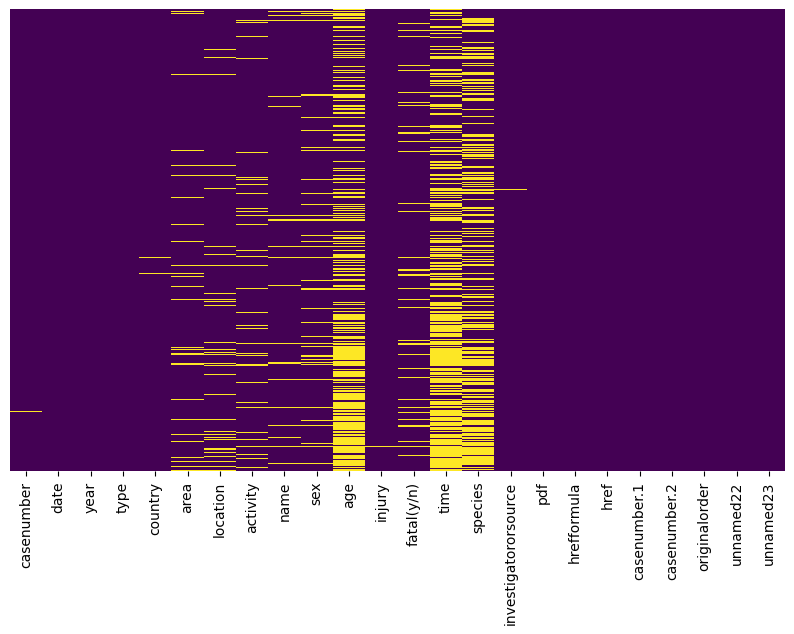

In [71]:
grafico(shark)

Una vez llegados a este punto entiendo que los valores nulos más 'gordos' ya se han limpiado, por lo que el siguiente paso sería quitar los nulos de una manera más 'fina' y eso lo realizo en la parte 2